In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler

from lab_utils_multi import load_house_data
from lab_utils_common import dlc

In [6]:
np.set_printoptions(precision=2)
plt.style.use("./deeplearning.mplstyle")

In [7]:
xtr, ytr = load_house_data()
x_features = ["size(sqft)", "bedrooms", "floors", "age"]

In [8]:
scalar = StandardScaler()
x_norm = scalar.fit_transform(xtr)

In [10]:
print(f"Raw: {np.ptp(xtr,axis=0)}")
print(f"Nomralized: {np.ptp(x_norm,axis=0)}")

Raw: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Nomralized: [5.85 6.14 2.06 3.69]


In [13]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, ytr)

SGDRegressor()

In [16]:
print(f"Iterations: {sgdr.n_iter_}, number of updated weights: {sgdr.t_}")

Iterations: 122, number of updated weights: 12079.0


In [17]:
print(f"B = {sgdr.intercept_}, W = {sgdr.coef_}")

B = [363.15], W = [110.13 -21.03 -32.43 -38.04]


In [22]:
y_hat_sgd = sgdr.predict(x_norm)
y_hat_np = np.dot(x_norm,sgdr.coef_) + sgdr.intercept_
print(f"prediction from np.dot and scikit is same = {(y_hat_sgd==y_hat_np).all()}")

prediction from np.dot and scikit is same = True


In [27]:
print("Prediction: ", y_hat_np[:4])
print("Actual: ", ytr[:4])

Prediction:  [295.17 485.94 389.65 492.1 ]
Actual:  [300.  509.8 394.  540. ]


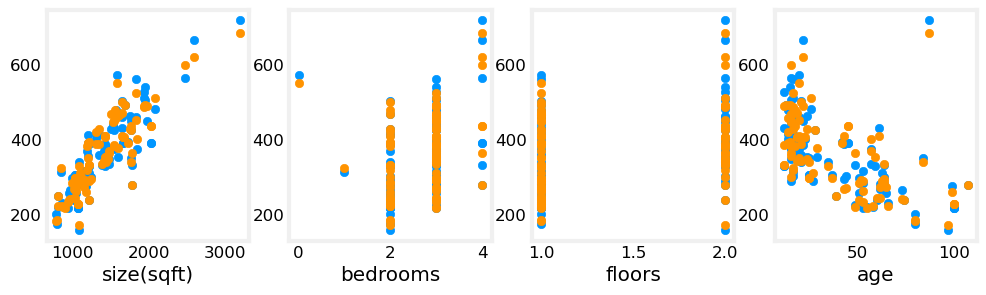

In [30]:
fig, ax = plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    ax[i].scatter(xtr[:,i], ytr, label="Target")
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(xtr[:,i], y_hat_sgd, label="Prediction")

In [32]:
linear_model = LinearRegression()
linear_model.fit(x_norm, ytr)

LinearRegression()

In [33]:
print(f"W= {linear_model.coef_}")
print(f"B= {linear_model.intercept_}")

W= [110.56 -21.27 -32.71 -37.97]
B= 363.1560808080808


In [35]:
y_hat_lm = linear_model.predict(x_norm)

print(f"Linear Model: {y_hat_lm[:4]}")
print(f"Actual: {ytr[:4]}")

Linear Model: [295.18 485.98 389.52 492.15]
Actual: [300.  509.8 394.  540. ]


In [44]:
x_house = np.array([1200, 3,1,40])
x_house.shape

(4,)

In [45]:
xh1 = x_house.reshape(-1,4)
xh1.shape

(1, 4)

In [52]:
print(f"{linear_model.predict(xh1)[0]:0.1f}")

131420.3
